### Implementation of Anomaly Detection Algorithm
Implement an anomaly detection algorithm to detect
anomalous behavior in server computers. The features measure the through-
put (mb/s) and latency (ms) of response of each server. Use a Gaussian model to detect anomalous examples in your
dataset.
<img src="./images/fraud_detection.jpg" width="300" />


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import warnings; warnings.simplefilter('ignore')

#### Data visualisation

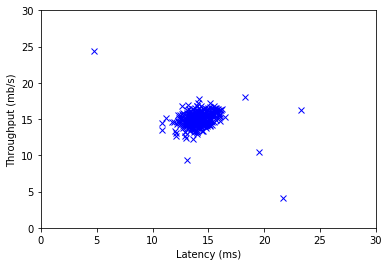

In [2]:
data = loadmat('./data/Anormal_detection.mat')
X = data['X']
Xval = data['Xval']
yval = data['yval']
fig, ax = plt.subplots()
ax.plot(X[:,0], X[:,1], 'bx')
plt.axis([0,30,0,30])
plt.xlabel('Latency (ms)');
plt.ylabel('Throughput (mb/s)');

#### Multivariate Gaussian implementation and visualisation

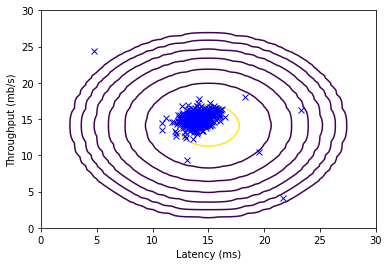

In [3]:
def estimateGaussian(X):
    m, n = X.shape[0], X.shape[1]
    mu = np.mean(X, axis=0)
    sigma2 = np.std(X, axis=0)**2
    return mu, sigma2

def multivariateGaussian(X, mu, sigma2):
    p = np.power(2*np.pi*sigma2, -0.5)*np.exp(np.divide(-(X-mu*np.ones(X.shape))**2, 2*sigma2))
    p = np.prod(p,axis=1)
    return p

def visualizeFit(X,mu,sigma2):
    X1 = np.arange(0,35,0.5)
    X2 = np.arange(0,35,0.5)
    xv, yv = np.meshgrid(X1, X2, sparse=True)
    p = np.ones((X1.shape[0],X2.shape[0]))
    for i in range(len(X1)):
        px1 = pow(2*np.pi*sigma2[0], -0.5)*np.exp(-(X1[i]-mu[0])**2/2/sigma2[0])
        for j in range(len(X2)):
            px2 = pow(2*np.pi*sigma2[1], -0.5)*np.exp(-(X2[j]-mu[1])**2/2/sigma2[1])
            p[i,j] = px1*px2
    ax.contour(X1,X2,p,levels=10**(np.arange(-20., 1, 3)))
    
mu,sigma2 = estimateGaussian(X)
p = multivariateGaussian(X, mu, sigma2)
visualizeFit(X,mu,sigma2)
fig

#### Anormaly Detection threshold optimisation

In [4]:
def selectThreshold(yval, pval):
    bestEpsilon = 0;
    bestF1 = 0;
    F1 = 0;
    steps = 1000
    stepsize = (np.max(pval) - np.min(pval)) / steps;
    li = [i*stepsize+np.min(pval) for i in range(steps)]
    for epsilon in li:
        True_positive = 0
        predictions = (pval < epsilon)
        for j in range(pval.shape[0]):
             if predictions[j]==1:
                if predictions[j]==yval[j]:
                    True_positive = True_positive+1;

        if np.sum(predictions) == 0:
            F1 = 0;
        elif True_positive ==0:
            F1 = 0
        else:
            Precision = True_positive/np.sum(predictions);
            Recall    = True_positive/np.sum(yval);
            F1 = 2*(Precision*Recall)/(Precision+Recall);

        if F1 > bestF1:
            bestF1 = F1
            bestEpsilon = epsilon
    return bestEpsilon, bestF1

pval = multivariateGaussian(Xval, mu, sigma2)        
epsilon,F1 = selectThreshold(yval, pval)

In [5]:
print('Best epsilon found using cross-validation: %.3e' % epsilon);
print('Best F1 on Cross Validation Set:  %.3f' % F1);

Best epsilon found using cross-validation: 8.991e-05
Best F1 on Cross Validation Set:  0.875


(array([300, 301, 303, 304, 305, 306]),)


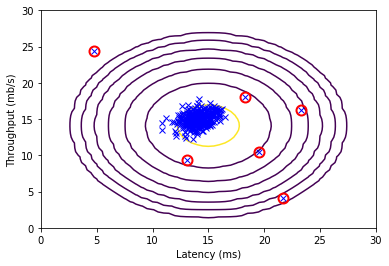

In [6]:
outliers = np.where((p < epsilon) == 1)
print(outliers)
# Draw a red circle around those outliers
ax.plot(X[outliers, 0], X[outliers, 1], 'ro', ms=10, mfc='None', mew=2,  fillstyle='none');
fig


#### More complicate Case with 11 Features

In [7]:
data = loadmat('./data/Anormal_detection2.mat')
X = data['X']
Xval = data['Xval']
yval = data['yval']
mu,sigma2 = estimateGaussian(X)
p = multivariateGaussian(X, mu, sigma2)
pval = multivariateGaussian(Xval, mu, sigma2)        
epsilon,F1 = selectThreshold(yval, pval)

In [12]:
print('Best epsilon found using cross-validation: %e'% epsilon);
print('Best F1 on Validation Set:  %f'% F1);
print('# Outliers found: %d\n'% sum(p < epsilon));


Best epsilon found using cross-validation: 1.377229e-18
Best F1 on Validation Set:  0.615385
# Outliers found: 117

